# Marketing Campaign Analysis
*Campaign performance report and practice machine learning in predicting response rate*

Author - Sue Huynh

Date - 3/30/2023

Dataset Source - https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

https://www.kaggle.com/code/raphael2711/data-prep-visual-eda-and-statistical-hypothesis#2.-Visual-Exploratory-Data-Analysis-

**Context:**

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service. The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

**Data Description:**

Check out the attached text file

# 1. Preparation

### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep = ";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# 2. Data Preprocessing

## Overview

In [3]:
print("Our dataset shape is {}".format(df.shape))

Our dataset shape is (2240, 29)


Our marketing dataset has 2240 distinct rows and 29 columns. One of them is the `'ID'` column, which will not be used for our machine learning process later, so we will drop it.

In [4]:
df = df.drop('ID', axis = 1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


Now, our dataset has 2240 rows and 28 columns (features) that are ready for exploratory and machine learning.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

Our dataset has:

* 25 features that are numerical

* 3 features that are non-numerical that we should consider to engineering in the next process

* 1 column with null values - `Income`

## Non-numerical Feature Engineering

Now, we are looking at 3 non-numerical features: `'Education'`, `'Marital_Status'`, and `'Dt_Customer'` to further understand the `'Response'` (target) of each customer segments.

We will first explore the proportion for each segment and the response rate of customers within them

The `Response Rate` for each segment will be calculated as the ratio between number of customers *responded* and the total number of customers within the segment

### Education Level

In [6]:
education_response = df.groupby(['Education']).agg({'Response' : 'sum'}).reset_index()
education_cnt = df.groupby(['Education'], as_index = False).agg({'Education' : 'count'})
education_cnt = education_cnt.rename(columns={'Education' : 'Count'})

#segment response rate
education_rr = pd.merge(education_response, education_cnt, left_index=True, right_index=True)
education_rr['Response_Rate (%)'] = round(education_rr['Response'] / education_rr['Count']*100,2)
education_rr.sort_values(by = 'Response_Rate (%)', ascending = True, inplace = True)
education_rr

,Education,Response,Count,Response_Rate (%)
1,Basic,2,54,3.70
0,2n Cycle,22,203,10.84
2,Graduation,152,1127,13.49
3,Master,57,370,15.41
4,PhD,101,486,20.78


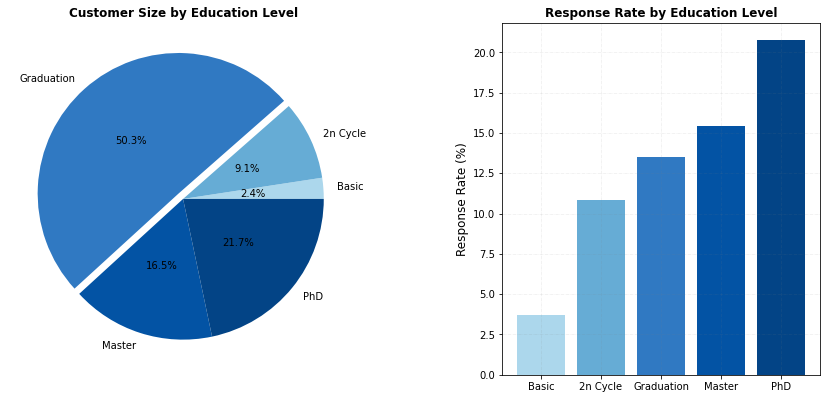

In [7]:
fig, ax = plt.subplots(1,2, figsize=[15,10])

edu_pie = plt.subplot2grid((3, 4), (0, 0), colspan = 2, rowspan = 2)
edu_bar = plt.subplot2grid((3, 5), (0, 3), colspan = 2, rowspan = 2)

labels = education_rr['Education']
colors = ['#acd7ec', '#66acd5', '#3079c2', '#0353a4', '#034486']
edu_pie.pie(x = education_rr['Count'], labels = labels, autopct="%.1f%%", colors = colors, explode = [0, 0, 0.05, 0, 0], pctdistance = 0.5)
edu_pie.set_title("Customer Size by Education Level", fontsize = 12, fontweight = 'bold')


edu_bar.bar(education_rr['Education'], education_rr['Response_Rate (%)'], color = colors)
edu_bar.set_title('Response Rate by Education Level', fontsize = 12, fontweight = 'bold')
edu_bar.set_ylabel('Response Rate (%)', fontsize = 12)
edu_bar.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

plt.show()

With the bar chart above, we are seeing that the education level is correlated to the response rate. 

There's one possible factor affecting this correlation: the size of the segment - lower education level (**Basic, 2n Cycle**) has both low response rate and small customer segment. However, even **Graduation** accounted for the majority of the customer population, its response rate is lower than those of **Master** and **PhD**.

Hence, education level could be a significant feature. To engineer the education level into numerical feature, we can use the total number of years of education the individual achieved according to its diploma, as follow:

* Basic &rarr; 6
* 2n Cycle &rarr; 12
* Graduation &rarr; 16
* Master &rarr; 18
* PhD &rarr; 23

We are creating a new column `EducationYrs`

In [8]:
df['EducationYrs'] = df['Education']
df.loc[df['EducationYrs'] == 'Basic', 'EducationYrs'] = 6
df.loc[df['EducationYrs'] == '2n Cycle', 'EducationYrs'] = 12
df.loc[df['EducationYrs'] == 'Graduation', 'EducationYrs'] = 16
df.loc[df['EducationYrs'] == 'Master', 'EducationYrs'] = 18
df.loc[df['EducationYrs'] == 'PhD', 'EducationYrs'] = 23
df['EducationYrs'] = df['EducationYrs'].astype(int)

In [9]:
df['EducationYrs'].describe()

count    2240.000000
mean       17.245536
std         3.688820
min         6.000000
25%        16.000000
50%        16.000000
75%        18.000000
max        23.000000
Name: EducationYrs, dtype: float64

### Martial Status

In [10]:
marital = df.groupby(['Marital_Status'])['Marital_Status'].count()
marital

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: Marital_Status, dtype: int64

We are seeing that the categories within the `'Martial_Status'` is quite messy and overlap on each other, so we will starting some grouping and recalculate the summary. 

Specifically, we will group `'Absurd'` + `'Alone'` + `'Single'` + `'YOLO'` -> `'Single'`

In [11]:
df.loc[df['Marital_Status'] == "Absurd", 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status'] == "Alone", 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status'] == "YOLO", 'Marital_Status'] = 'Single'

#segment size
marital = df.groupby(['Marital_Status'])['Marital_Status'].count()
marital

Marital_Status
Divorced    232
Married     864
Single      487
Together    580
Widow        77
Name: Marital_Status, dtype: int64

In [12]:
marital_response = df.groupby(['Marital_Status']).agg({'Response' : 'sum'}).reset_index()
marital_cnt = df.groupby(['Marital_Status'], as_index = False).agg({'Marital_Status' : 'count'})
marital_cnt = marital_cnt.rename(columns = {'Marital_Status' : 'Count'})

#segment response rate
marital_rr = pd.merge(marital_response, marital_cnt, left_index = True, right_index = True)
marital_rr['Response_Rate (%)'] = round(marital_rr['Response'] / marital_rr['Count']*100,2)
marital_rr.sort_values(by = 'Response_Rate (%)', ascending = True, inplace = True)
marital_rr

,Marital_Status,Response,Count,Response_Rate (%)
3,Together,60,580,10.34
1,Married,98,864,11.34
0,Divorced,48,232,20.69
2,Single,109,487,22.38
4,Widow,19,77,24.68


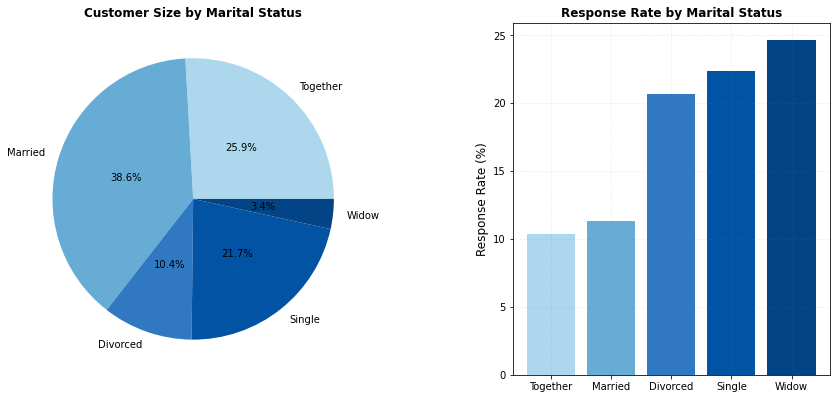

In [13]:
fig, ax = plt.subplots(1,2, figsize = [15, 10])

mar_pie = plt.subplot2grid((3, 4), (0, 0), colspan = 2, rowspan = 2)
mar_bar = plt.subplot2grid((3, 5), (0, 3), colspan = 2, rowspan = 2)

labels = marital_rr['Marital_Status']
colors = ['#acd7ec', '#66acd5', '#3079c2', '#0353a4', '#034486']
mar_pie.pie(x = marital_rr['Count'], labels = labels, autopct = "%.1f%%", colors = colors, pctdistance = 0.5)
mar_pie.set_title("Customer Size by Marital Status", fontsize = 12, fontweight = 'bold')

colors = ['#acd7ec', '#66acd5', '#3079c2', '#0353a4', '#034486']
mar_bar.bar(marital_rr['Marital_Status'], marital_rr['Response_Rate (%)'], color = colors)
mar_bar.set_title('Response Rate by Marital Status', fontsize = 12, fontweight = 'bold')
mar_bar.set_ylabel('Response Rate (%)', fontsize = 12)
mar_bar.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

plt.show()

With the bar chart above, we notice that the customer segment with **no partners** (`'Divorced'`, `'Single'`, `'Widow'`) have **higher response rate** despite accounted for smaller proportion in the total population.

We can simply engineer this feature into binary datatype with 1 for having partner and 0 for not having partners.

In [14]:
df.loc[(df['Marital_Status'] == 'Together') | (df['Marital_Status'] == 'Married'), 'Marital_Status'] = 1
df.loc[df['Marital_Status'] != 1, 'Marital_Status'] = 0
df['Marital_Status'] = df['Marital_Status'].astype(int)
df['Marital_Status'].describe()

count    2240.000000
mean        0.644643
std         0.478728
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Marital_Status, dtype: float64

### Dwell Time

From the **Overview** section, we see that the `'Dt_Customer'` feature marks the first date of each customer with the company. However, at this stage, this information will not be very useful unless we transform it into the amount of time the customer has spent with the company.

The campaign ran during 2020, so we will choose the first day of 2020 `2020-01-01` to calculate the Dwell Time for each customer before the campaign started

In [15]:
#check if Dt_Customer is already in datetime
type(df['Dt_Customer'][0])

str

Now, we will convert the data type into datetime to perform year difference calculation

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).dt.date
print(df['Dt_Customer'][0])
type(df['Dt_Customer'][0])

2012-09-04


datetime.date

In [17]:
start = date(2020, 1, 1)
df['Dwell_Time'] = round((start - df['Dt_Customer']) / np.timedelta64(1, 'M'),0)
df = df.drop('Dt_Customer', axis = 1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,EducationYrs,Dwell_Time
0,1957,Graduation,0,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,16,88.0
1,1954,Graduation,0,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,16,70.0
2,1965,Graduation,1,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,16,76.0
3,1984,Graduation,1,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,16,71.0
4,1981,PhD,1,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,23,71.0


In [18]:
df['Dwell_Time'].describe()

count    2240.000000
mean       77.719643
std         6.663746
min        66.000000
25%        72.000000
50%        78.000000
75%        83.000000
max        89.000000
Name: Dwell_Time, dtype: float64

## Numerical Feature Engineering

### Year Birth 

The given year birth might give us difficulties in intuitively understanding the customer demography. We will change `'Year_Birth'` column into `'Age'` to present the age of the customer when we ran the campaign (2020)

In [19]:
#check datattype
type(df['Year_Birth'][0])

numpy.int64

In [20]:
df['Age'] = 2020 - df['Year_Birth']
df['Age'].describe()

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Age, dtype: float64

We will drop the unnecessary column `Year_Birth`

In [21]:
df = df.drop('Year_Birth', axis = 1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,EducationYrs,Dwell_Time,Age
0,Graduation,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,16,88.0,63
1,Graduation,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,16,70.0,66
2,Graduation,1,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,16,76.0,55
3,Graduation,1,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,16,71.0,36
4,PhD,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,23,71.0,39


### Kids 

Here, to reduce the number of variables for our models, we can combine `KidHome` and `Teenhome` as the total number of kids in each family - `NumKids`

In [22]:
df['NumKids'] = df['Kidhome'] + df['Teenhome']
df.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,EducationYrs,Dwell_Time,Age,NumKids
0,Graduation,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,3,11,1,16,88.0,63,0
1,Graduation,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,3,11,0,16,70.0,66,2
2,Graduation,1,71613.0,0,0,26,426,49,127,111,...,0,0,0,3,11,0,16,76.0,55,0


In [23]:
df = df.drop(['Kidhome','Teenhome'], axis = 1)
df.shape

(2240, 28)

### Purchases 

Similar to the `KidHome` and `Teenhome`, we will also combine the purchase variables into one `NumPurchases` to look at the overall distribution and reduce the number of variables

In [24]:
df['NumPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

### Spending

We also do the same thing for the spending amount in different product categories

In [25]:
df['MntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Previously Accepted Campaign

We are grouping all the customers that have been responded to previous campaigns to mark them as responded, which will also help us identify the customer acquisition efficiency of the lastest campaign.

In [26]:
df['AcceptedPrv'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df.loc[df['AcceptedPrv'] > 0, 'AcceptedPrv'] = 1
df['AcceptedPrv'].describe()

count    2240.000000
mean        0.206696
std         0.405026
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedPrv, dtype: float64

### Z_CostContact & Z_Revenue

From data exploration above, we are seeing that the data in `Z_CostContact` and `Z_Revenue` are quite homogenous, which will not be helpful for our model. We will go ahead and remove them from our dataset.

In [27]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)
df.shape

(2240, 29)

## Statistic

Now, we are performing statiscal summary on major features only - printed below

In [28]:
variables = list(df.columns)
variables = [x for x in variables if x not in ['Education','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response']]
variables

['Marital_Status',
 'Income',
 'Recency',
 'NumWebVisitsMonth',
 'Complain',
 'EducationYrs',
 'Dwell_Time',
 'Age',
 'NumKids',
 'NumPurchases',
 'MntSpent',
 'AcceptedPrv']

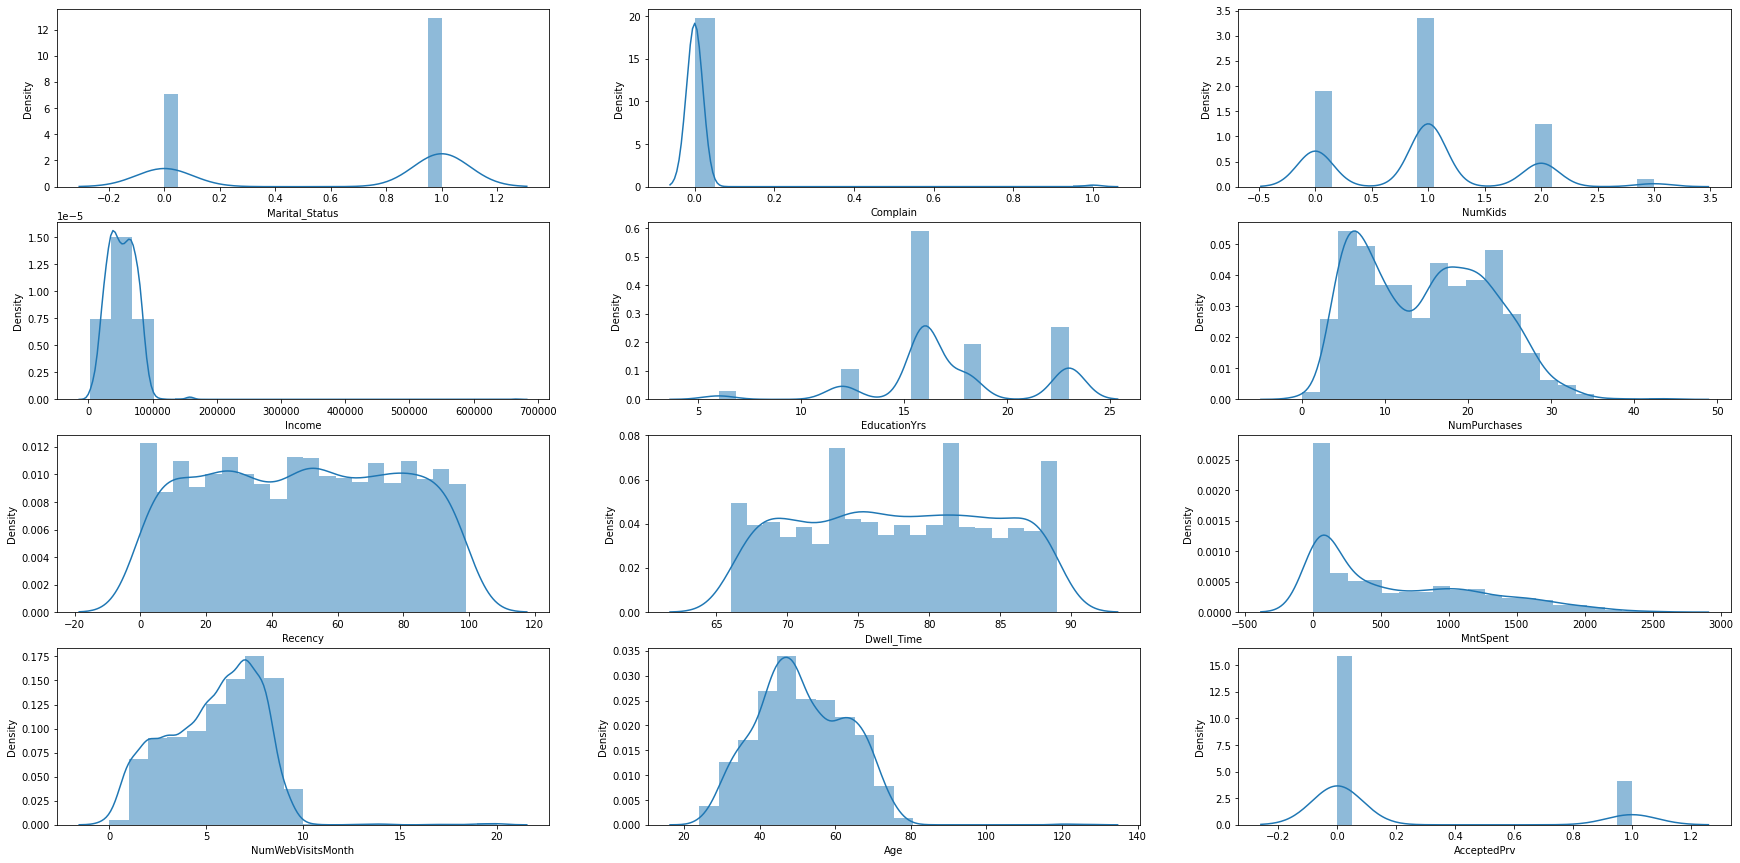

In [29]:
fig, axes = plt.subplots(4, 3, figsize = [30,15])

i = 0
j = 0
index = 0

for variable in variables:
    sns.distplot(df[variable], bins=20, hist_kws={'alpha': 0.5}, ax = axes[i][j])
    index += 1
    i += 1
    if index >= 4:
        j = index // 4
        i = index % 4

plt.show()

### Insights

* **Marital Status**: The majority of our customers are in couples.

* **Income**: Most of our customers earn in the 80K - 100K with a few individuals falling out of the range &rarr; We will need to examine if these are *extreme outliers*.
* **Education**: With the highest frequency in 16, it is showed that our customer base are mostly having higher degree.
* **Age**: Our customers' age data is normally distributed with a mean around 50s and a few individuals aging 100+ &rarr; We will need to examine if these are *extreme outlier*
* **NumKids**: Our customer household have from 0 to 3 kids per household with the majority of them having 1 kid.
* **Recency**: Our customer recency (number of days since their last purchases) are quite uniformly distributed. Having '0' days as the most frequent in recency is a very good news for us, showing that we are having a good number of current customer.
* **Number of Web Visit**: Most of our customers visits the website 5-10 times a month
* **Complain**: We are also seeing good signs that we barely have any complaints
* **Dwell Time**: The number of months customers staying with us is quite uniformly distributed with the most frequent dwell time are 74 months, 82 months, and 87 months.
* **NumPurchases**: The total number of purchases made by our customers are normally distributed with 2 peaks, around 7 purchases and around 20 purchases.
* **MntSpent**: The spending amount is positively skewed, with the highest frequency in 0-125 dollars.
* **Complain**: We are also seeing good signs that we barely have any complaints
* **AcceptedPrv**: One noticeable insight here is that most of our customers in the lastest campaign did not accept the previous 5 campaigns

## Missing Values

As seen earlier, the `'Income'` variable has 24 missing values.
There are several ways to handle null-values :

* We can delete the entire column containing null-values
* We can delete the rows containing null-values
* We can impute the mean value
* We can input the mean value of a specific population : in this case we would split by Education diploma
* We can use a model to predict missing values

With our dataset, we will go for the last option and use the K-Nearest Neighbor Imputation.
KNN Imputation works by **imputing the average income** of the **k nearest neighbors** found in the training set for each of the missing value.
We will use `'Education'`, `'Age'` and `'Income'` to run the algorithm. KNNimputer will automatically normalize our data.

In [30]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')
# fit on the dataset
imputer.fit(df[['Income','Age','EducationYrs']])
# transform the dataset
X = imputer.transform(df[['Income','Age','EducationYrs']])
Income_impute=pd.DataFrame(X,columns=['Income','Age','EducationYrs'])
df['Income']=Income_impute['Income'].reset_index(drop=True)
count_nan = len(df) - df.count()
print(count_nan)

Education              0
Marital_Status         0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
EducationYrs           0
Dwell_Time             0
Age                    0
NumKids                0
NumPurchases           0
MntSpent               0
AcceptedPrv            0
dtype: int64


## Outliers

#### Extreme Outliers

We will remove extreme outlier, which is any value greater (lower) 3 times the IQR above (below) the third quartile (the first quartile).

$$
  IQR = Q_3 - Q_1
$$

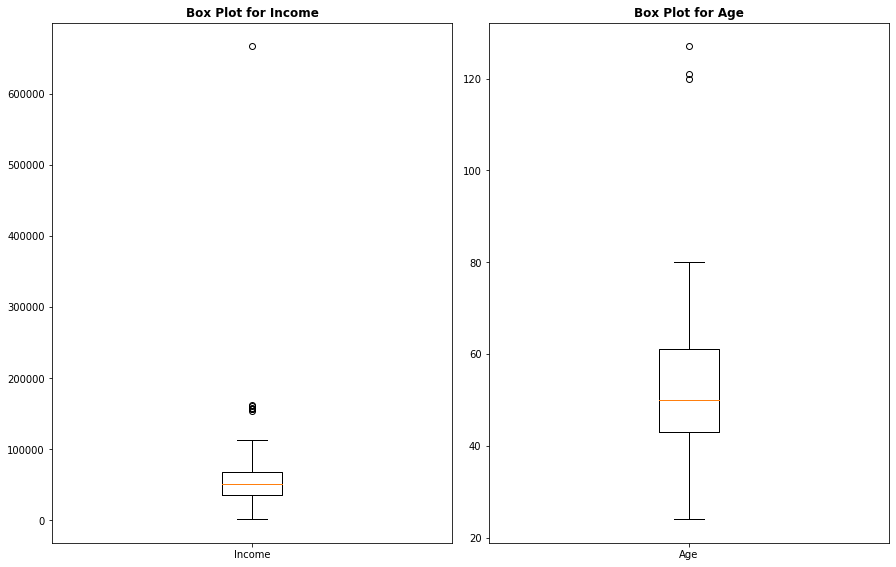

In [31]:
fig, ax = plt.subplots(1,2, figsize = [15, 20])

income = plt.subplot2grid((4, 4), (0, 0), colspan = 2, rowspan = 2)
age = plt.subplot2grid((4, 4), (0, 2), colspan = 2, rowspan = 2)

income.boxplot(df['Income'])  
income.set_title("Box Plot for Income", fontsize = 12, fontweight = 'bold')
income.set_xticklabels(['Income'])

age.boxplot(df['Age'])  
age.set_title("Box Plot for Age", fontsize = 12, fontweight = 'bold')
age.set_xticklabels(['Age'])

plt.show()

In [32]:
q1_income = df['Income'].quantile(.25)
q3_income = df['Income'].quantile(.75) 
iqr = q3_income - q1_income
outliers_income = df.loc[(df['Income'] < q1_income - 3*iqr) | (df['Income'] > q3_income + 3*iqr)]['Income']
outliers_income

2233    666666.0
Name: Income, dtype: float64

There are *one* extreme outliers for the `'Income'` features, and we will drop that data point as it accounts for very small proportion of our original data size.

In [33]:
df.shape

(2240, 29)

In [34]:
df = df.loc[df['Income'] != 666666.0]
df.shape

(2239, 29)

In [35]:
q1_age = df['Age'].quantile(.25)
q3_age = df['Age'].quantile(.75) 
iqr_age = q3_age - q1_age
outliers_age = df.loc[(df['Age'] < q1_age - 3*iqr_age) | (df['Age'] > q3_age + 3*iqr_age)]['Age']
outliers_age

192    120
239    127
339    121
Name: Age, dtype: int64

Similarly, there are *three* extreme outliers for the `'Age'` features, and we will drop that data points as they also account for very small proportion of our original data size.

In [36]:
df = df.loc[df['Age'] < 120]
df.shape

(2236, 29)

# 3. Data Visualization

In this section, we will create several scatterplots to explore the correlation between the major features.

#### Spending & Income

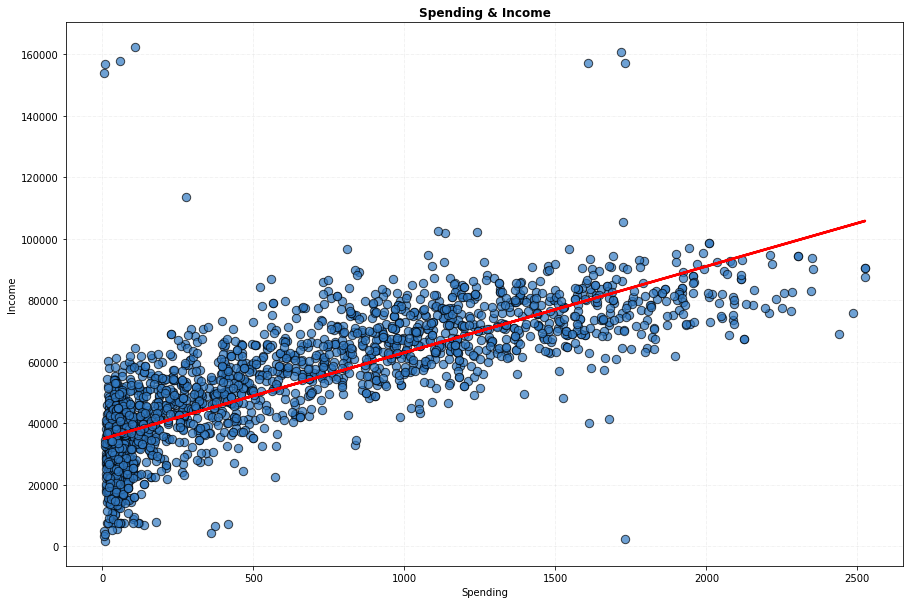

In [37]:
# Spending and Income
fig, ax = plt.subplots(figsize = [15, 10])

ax.scatter(df['MntSpent'], df['Income'], s = 70, color = '#3079c2', alpha = 0.7, edgecolors = 'k')
b, a = np.polyfit(df['MntSpent'], df['Income'], deg=1)

ax.plot(df['MntSpent'], a + b * df['MntSpent'], color = 'red', lw = 2.5)
plt.title("Spending & Income", fontsize = 12, fontweight = 'bold')
plt.xlabel('Spending', fontsize = 10)
plt.ylabel('Income', fontsize = 10)
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

plt.show()

The plot is suggesting a positive relationship between `'Spending'` and `'Income'`

#### Spending & Number of Kids at home

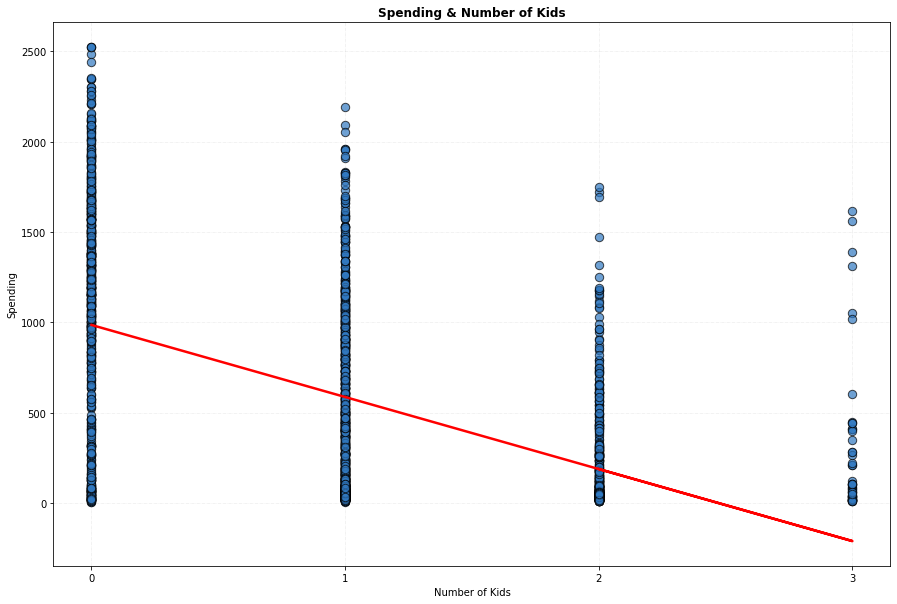

In [38]:
# Spending and Number of Kids at home
fig, ax = plt.subplots(figsize = [15, 10])

ax.scatter(df['NumKids'], df['MntSpent'], s = 70, color = '#3079c2', alpha = 0.7, edgecolors = 'k')
b, a = np.polyfit(df['NumKids'], df['MntSpent'], deg=1)

ax.plot(df['NumKids'], a + b * df['NumKids'], color = 'red', lw = 2.5)
plt.title("Spending & Number of Kids", fontsize = 12, fontweight = 'bold')
plt.xlabel('Number of Kids', fontsize = 10)
ax.set_xticks([0, 1, 2, 3])
plt.ylabel('Spending', fontsize = 10)
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

plt.show()

The plot is suggesting a negative relationship between `'Spending'` and `'NumKids'`

#### Spending & Monthly Web Visits

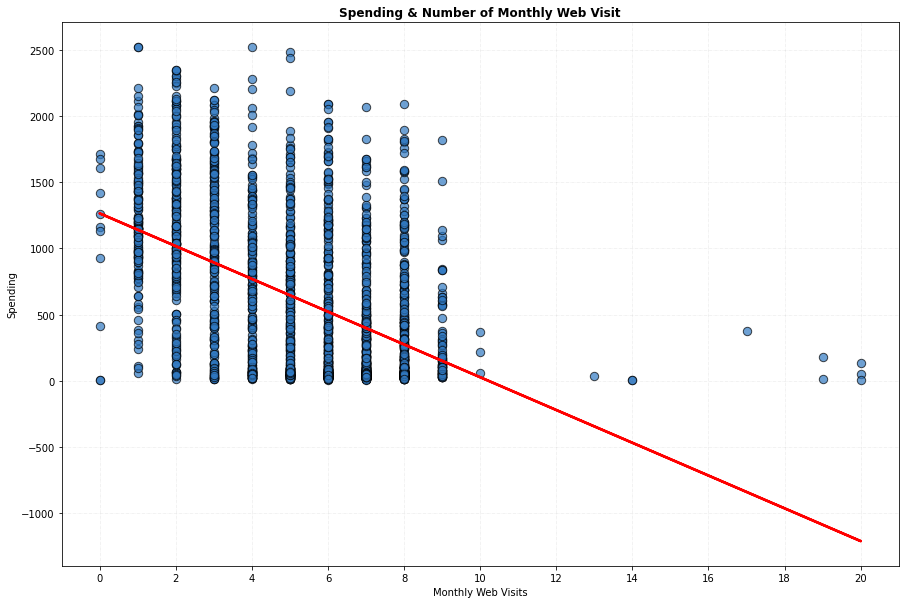

In [39]:
# Spending against Web Visit
fig, ax = plt.subplots(figsize = [15, 10])

ax.scatter(df['NumWebVisitsMonth'], df['MntSpent'], s = 70, color = '#3079c2', alpha = 0.7, edgecolors = 'k')
b, a = np.polyfit(df['NumWebVisitsMonth'], df['MntSpent'], deg=1)

ax.plot(df['NumWebVisitsMonth'], a + b * df['NumWebVisitsMonth'], color = 'red', lw = 2.5)
ax.set_xticks(np.arange(21, step=2))
plt.title("Spending & Number of Monthly Web Visit", fontsize = 12, fontweight = 'bold')
plt.xlabel('Monthly Web Visits', fontsize = 10)
plt.ylabel('Spending', fontsize = 10)

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

plt.show()

The plot is suggesting a negative relationship between `'Spending'` and `'NumWebVisitsMonth'`

#### Income & Education

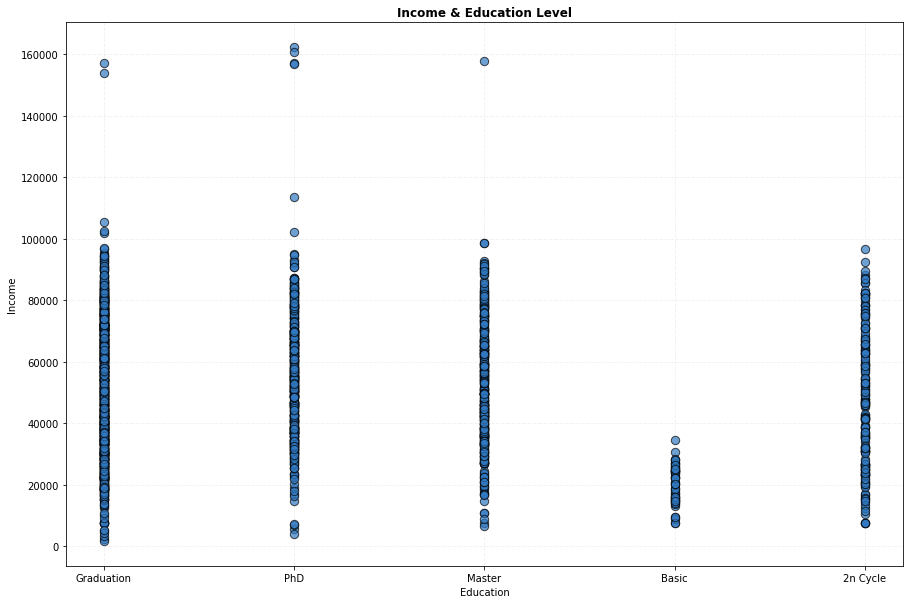

In [40]:
# Income and Education
fig, ax = plt.subplots(figsize = [15, 10])

field = "Education"
level_education = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

ax.scatter(df['Education'], df['Income'], s = 70, color = '#3079c2', alpha = 0.7, edgecolors = 'k')
plt.title("Income & Education Level", fontsize = 12, fontweight = 'bold')
plt.xlabel('Education', fontsize = 10)
plt.ylabel('Income', fontsize = 10)
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

plt.show()

The plot is suggesting a positive relationship between `'Spending'` and `'EducationYrs'`

#### Income & Monthly Web Visits

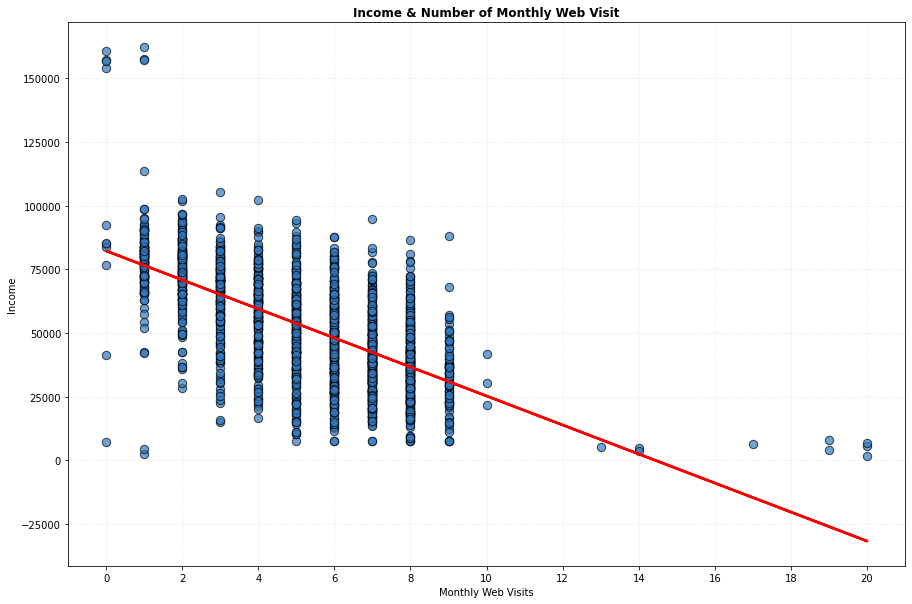

In [41]:
# Income against Web Visit
fig, ax = plt.subplots(figsize = [15, 10])

ax.scatter(df['NumWebVisitsMonth'], df['Income'], s = 70, color = '#3079c2', alpha = 0.7, edgecolors = 'k')
b, a = np.polyfit(df['NumWebVisitsMonth'], df['Income'], deg=1)

ax.plot(df['NumWebVisitsMonth'], a + b * df['NumWebVisitsMonth'], color = 'red', lw = 2.5)
ax.set_xticks(np.arange(21, step=2))
plt.title("Income & Number of Monthly Web Visit", fontsize = 12, fontweight = 'bold')
plt.xlabel('Monthly Web Visits', fontsize = 10)
plt.ylabel('Income', fontsize = 10)

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

plt.show()

The plot is suggesting a positive relationship between `'Income'` and `'NumWebVisitsMonth'`

#### Consumption 

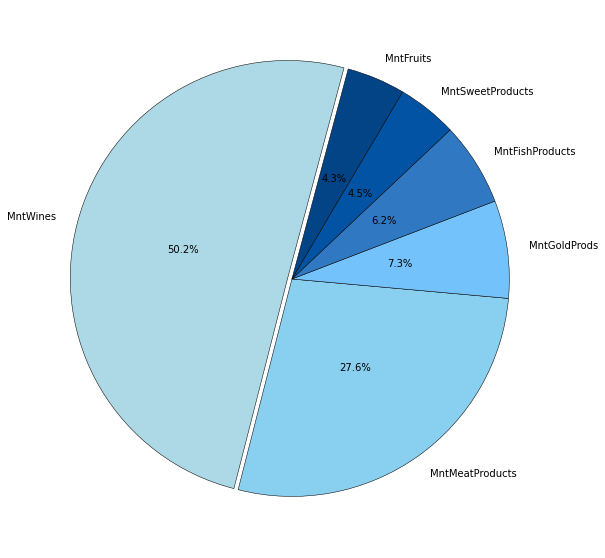

In [42]:
# Product Consumption
fig, ax = plt.subplots(figsize = [15, 10])
fig.set_facecolor('white')

products = df[['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']].sum()

labels = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']
colors = ['#add8e6', '#89cff0', '#73c2fb', '#3079c2', '#0353a4', '#034486']


plt.pie(products, labels = labels, colors = colors, explode = [0.02, 0, 0, 0, 0, 0], autopct = "%.1f%%", startangle = 75, pctdistance = 0.5, wedgeprops = {"edgecolor" : "black",
                      'linewidth': .5,
                      'antialiased': True})

plt.show()

Wines easily account for a majority of total sales (at 50.2%), with meat products being a second with nearly half the sales as Wines (at 27.6%). Other products accrue a similar amount of sales.

#### Media Efficiency

We are looking at which media channels acquired the most customers for us.

In [43]:
media = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
media

NumDealsPurchases       5201
NumWebPurchases         9140
NumCatalogPurchases     5955
NumStorePurchases      12959
dtype: int64

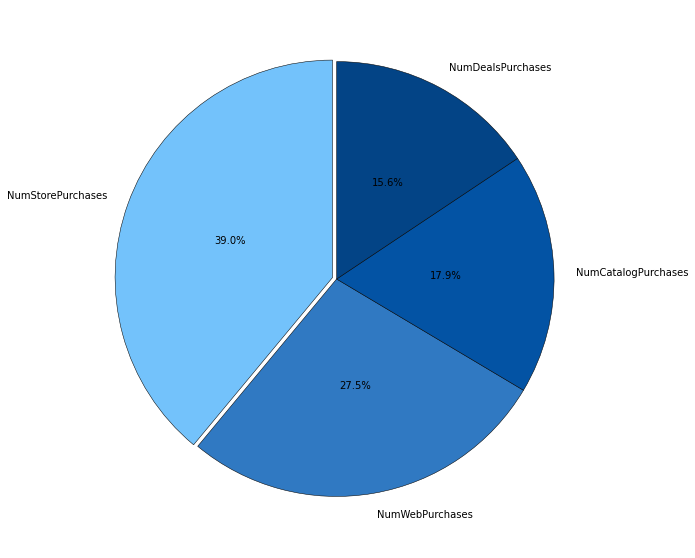

In [44]:
# Media Efficiency
fig, ax = plt.subplots(figsize = [15, 10])
fig.set_facecolor('white')

media = df[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']].sum()

labels = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']
colors = ['#73c2fb', '#3079c2', '#0353a4', '#034486']


plt.pie(media, labels = labels, colors = colors, explode = [0.02, 0, 0, 0], autopct = "%.1f%%", startangle = 90, pctdistance = 0.5, wedgeprops = {"edgecolor" : "black",
                      'linewidth': .5,
                      'antialiased': True})

plt.show()

Most of our sales do come from our store, but our web portal and catalogue are far from underutilized. 

#### Campaign Efficiency

We are also curious about how effective previous campaigns in retenting customers for the last campaign. In other words, we want to see of the customers reponded to that last campaign, how many of these responded to previous campaigns or brand new customers.

In [45]:
# Campaign Efficiency - How many from last campaign's customers were customers in other campaigns
cmp = df.loc[df['Response'] == 1, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
cmp['AcceptedNew'] = len(df.loc[(df['Response'] == 1) & (df['AcceptedPrv'] == 0)]) 
cmp

AcceptedCmp1     79
AcceptedCmp2     20
AcceptedCmp3     77
AcceptedCmp4     62
AcceptedCmp5     92
AcceptedNew     146
dtype: int64

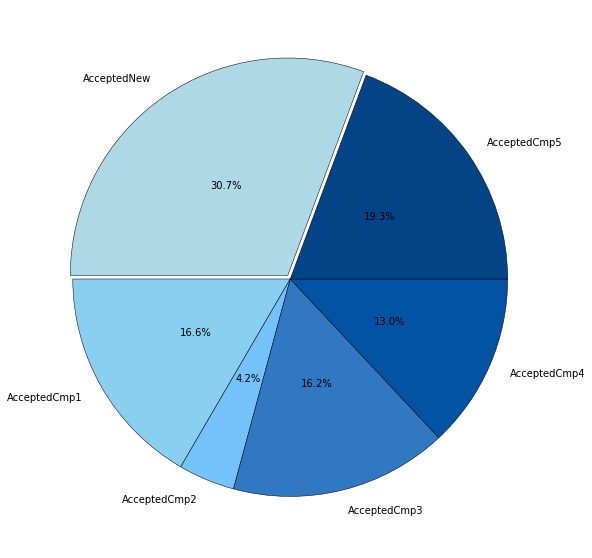

In [46]:
fig, ax = plt.subplots(figsize = [15, 10])
fig.set_facecolor('white')


labels = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedNew']
colors = ['#89cff0', '#73c2fb', '#3079c2', '#0353a4', '#034486', '#add8e6']


plt.pie(cmp, labels = labels, colors = colors, explode = [0, 0, 0, 0, 0, 0.02], autopct = "%.1f%%", startangle = 180, pctdistance = 0.5, wedgeprops = {"edgecolor" : "black",
                      'linewidth': .5,
                      'antialiased': True})

plt.show()

From the pie chart, we see that 30.7% of last campaign responses are new customers.

While Campaign 2 stands out as the one acquired the least proportion of customers for last campaign with only 4.2% of customers responded to it, other 4 campaigns contributed roughly the same percentage of responded customers for the last campaigns.

# 4. Machine Learning - Classification

Now that we've effectively cleaned and visualized key parts of our data we're ready to undertake building models that can classify whether a customer is likely to engage in our current campaign or not. 

From those models, we want to see which produces the most accurate and reliable results to use it for future response prediction. We also hope to find variables that are most influential in this process so that we can make changes to future campaigns to find higher engagement. 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   object 
 1   Marital_Status       2236 non-null   int32  
 2   Income               2236 non-null   float64
 3   Recency              2236 non-null   int64  
 4   MntWines             2236 non-null   int64  
 5   MntFruits            2236 non-null   int64  
 6   MntMeatProducts      2236 non-null   int64  
 7   MntFishProducts      2236 non-null   int64  
 8   MntSweetProducts     2236 non-null   int64  
 9   MntGoldProds         2236 non-null   int64  
 10  NumDealsPurchases    2236 non-null   int64  
 11  NumWebPurchases      2236 non-null   int64  
 12  NumCatalogPurchases  2236 non-null   int64  
 13  NumStorePurchases    2236 non-null   int64  
 14  NumWebVisitsMonth    2236 non-null   int64  
 15  AcceptedCmp3         2236 non-null   i

Our dataset currently having only one categorical feature `'Education'`, which was featured into `'EducationYrs'`. So, we will drop the categorical one.

In [48]:
df.drop(['Education'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marital_Status       2236 non-null   int32  
 1   Income               2236 non-null   float64
 2   Recency              2236 non-null   int64  
 3   MntWines             2236 non-null   int64  
 4   MntFruits            2236 non-null   int64  
 5   MntMeatProducts      2236 non-null   int64  
 6   MntFishProducts      2236 non-null   int64  
 7   MntSweetProducts     2236 non-null   int64  
 8   MntGoldProds         2236 non-null   int64  
 9   NumDealsPurchases    2236 non-null   int64  
 10  NumWebPurchases      2236 non-null   int64  
 11  NumCatalogPurchases  2236 non-null   int64  
 12  NumStorePurchases    2236 non-null   int64  
 13  NumWebVisitsMonth    2236 non-null   int64  
 14  AcceptedCmp3         2236 non-null   int64  
 15  AcceptedCmp4         2236 non-null   i

We'll import some important libraries for this machine learning models and then split the data into training and testing data to start.

In [49]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

### Splitting data

In [50]:
features = list(df.columns)
features = [x for x in features if x != 'Response']
print(features)

['Marital_Status', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'EducationYrs', 'Dwell_Time', 'Age', 'NumKids', 'NumPurchases', 'MntSpent', 'AcceptedPrv']


In [51]:
x = df.loc[:, features]
y = df.loc[:, ['Response']]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .7)

## Multivariable Linear Regression

#### Fit data

In [53]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

#### Predict data

In [54]:
y_pred = lr_model.predict(x_test)

#### Evaluate model

In [55]:
lr_model.score(x_test, y_test)

0.2729529965542087

In [56]:
score_lr = lr_model.score(x_test, y_test)
print(f"model score: {score_lr}")
print(f"intercept: {lr_model.intercept_}")
print(f"coefficients: {lr_model.coef_}")


model score: 0.2729529965542087
intercept: [-0.63284556]
coefficients: [[-1.17577663e-01  4.11708981e-07 -2.45776221e-03 -1.29656371e-04
   5.92977162e-04  1.93070567e-04 -1.45180628e-04 -5.68485225e-04
   1.15998071e-04  7.84424636e-03  8.63462094e-03  2.49179419e-03
  -1.89969316e-02  1.15067418e-02  3.68699578e-01  2.09723600e-01
   2.44801241e-01  2.46067259e-01  2.07756868e-01  5.87548361e-03
   1.11776345e-02  9.05023189e-03  2.45667286e-06 -3.82574055e-02
  -2.62701221e-05  5.87235752e-05 -8.32266671e-02]]


In [58]:
mse_lr = mean_squared_error(y_true= y_test, y_pred=y_pred, squared=True)
rmse_lr = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)


print('Linear Regression MSE: {:.6f}'.format(mse))
print('Linear Regression RMSE: {:.6f}'.format(rmse_lr))


Linear Regression MSE: 0.085229
Linear Regression RMSE: 0.291940


## Multi-Variate Logistic Regression

#### Fit data

In [59]:
log_model = LogisticRegression(solver = 'liblinear',  random_state= 0)
log_model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

#### Predict Data

In [60]:
y_pred = log_model.predict(x_test)

#### Evaluate Model

In [61]:
score_log = log_model.score(x_test, y_test)
print(f"model score: {score_log}")
print(f"intercept: {log_model.intercept_}")
print(f"coefficients: {log_model.coef_}")

model score: 0.886736214605067
intercept: [-0.1885791]
coefficients: [[-8.59147739e-01 -8.61437364e-06 -2.81553036e-02 -2.84585507e-04
   4.20400451e-03  1.06382198e-03 -3.51994591e-04 -4.25423800e-03
   7.62427685e-04  7.84110621e-02  1.18449836e-01  6.19455515e-02
  -2.56647698e-01  1.63383466e-01  6.05143897e-01  3.63872333e-01
   4.67382422e-01  4.45174677e-01  2.03052931e-01 -1.16806730e-03
   6.05947838e-02 -1.03063199e-02 -2.12765911e-02 -3.56958240e-01
   2.15875121e-03  1.13943608e-03  9.15776137e-01]]


In [63]:
mse_log = mean_squared_error(y_true= y_test, y_pred=y_pred, squared=True)
rmse_log = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)

print('Logistic Regression MSE: {:.6f}'.format(mse_log))
print('Logistic Regression RMSE: {:.6f}'.format(rmse_log))

Logistic Regression MSE: 0.113264
Logistic Regression RMSE: 0.336547


#### Optimize Model

In [64]:
log_model = LogisticRegression(solver = 'liblinear',  random_state= 0, C = 2.0)
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)
mse_log = mean_squared_error(y_true= y_test, y_pred=y_pred, squared=True)
rmse_log = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
score_log = log_model.score(x_test, y_test)

print(f"model score: {score_log}")
print('Logistic Regression MSE: {:.6f}'.format(mse_log))
print('Logistic Regression RMSE: {:.6f}'.format(rmse_log))

model score: 0.8777943368107303
Logistic Regression MSE: 0.122206
Logistic Regression RMSE: 0.349579


However, our optimizing method increases the RMSE and decreases the model score. Hence, we will use the model before optimizing.

In [65]:
log_model = LogisticRegression(solver = 'liblinear',  random_state= 0)
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)
score_log = log_model.score(x_test, y_test)
rmse_log = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)

#### Confusion Matrix

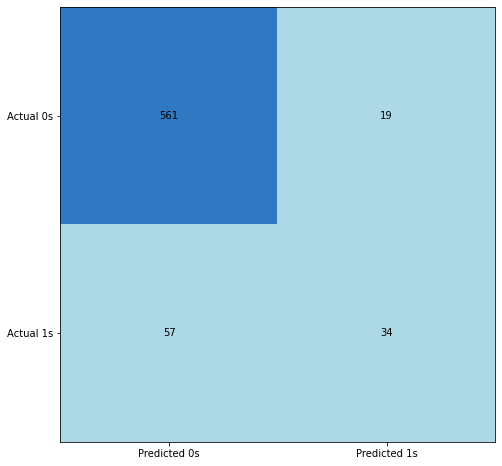

In [66]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))

cmap = ListedColormap(['#add8e6', '#3079c2'])
ax.imshow(cm, cmap= cmap)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='#000000')
plt.show()

Overall, our Logistic Regression model does a good job in predicting non-responding audience (564). However, our model is still quite pessimistic in predicting responding customer: more than 50% of responded customers were forcasted non-responding.

## Decision Tree

#### Fit data

In [67]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

#### Predict Data

In [68]:
y_pred = dt_model.predict(x_test)

#### Evaluate Model

In [69]:
score_dt = dt_model.score(x_test, y_test)
print(f"model score: {score_dt}")

model score: 0.842026825633383


In [70]:
mse_dt = mean_squared_error(y_true= y_test, y_pred=y_pred, squared=True)
rmse_dt = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
score_dt = dt_model.score(x_test, y_test)

print(f"model score: {score_dt}")
print('Decision Tree MSE: {:.6f}'.format(mse_dt))
print('Decision Tree RMSE: {:.6f}'.format(rmse_dt))

model score: 0.842026825633383
Decision Tree MSE: 0.157973
Decision Tree RMSE: 0.397458


#### Optimize Model

In [71]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [72]:
mse_dt = mean_squared_error(y_true= y_test, y_pred=y_pred, squared=True)
rmse_dt = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
score_dt = dt_model.score(x_test, y_test)

print(f"model score: {score_dt}")
print('Decision Tree MSE: {:.6f}'.format(mse_dt))
print('Decision Tree RMSE: {:.6f}'.format(rmse_dt))

model score: 0.8777943368107303
Decision Tree MSE: 0.122206
Decision Tree RMSE: 0.349579


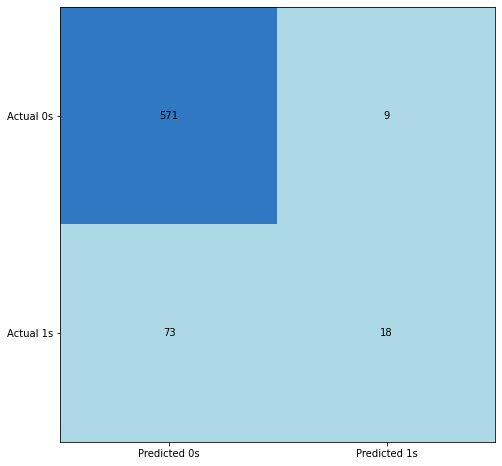

In [73]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))

cmap = ListedColormap(['#add8e6', '#3079c2'])
ax.imshow(cm, cmap= cmap)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='#000000')
plt.show()

## KNN

#### Fit Data

In [74]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

#### Predict Data

In [75]:
y_pred = knn_model.predict(x_test)

#### Model Evaluation

In [76]:
score_knn = knn_model.score(x_test, y_test)
print(f"model score: {score_knn}")

model score: -0.0017961348995831905


In [77]:
mse_knn = mean_squared_error(y_true= y_test, y_pred=y_pred, squared=True)
rmse_knn = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)

print('Decision Tree MSE: {:.6f}'.format(mse_knn))
print('Decision Tree RMSE: {:.6f}'.format(rmse_knn))

Decision Tree MSE: 0.117437
Decision Tree RMSE: 0.342690


#### Plot Model

In [78]:
y_pred_l1 = y_pred.tolist()

In [79]:
y_pred_l2 = []
y_pred_l2.extend(y_pred_l1)

y_pred_lst = [x[0] for x in y_pred_l2]
y_pred_lst[:5]

[0.2, 0.0, 0.4, 0.0, 0.0]

In [80]:
y_test_lst = y_test['Response'].tolist()

In [81]:
performance = pd.DataFrame({ 'True Value': y_test_lst,
                            'Prediction': y_pred_lst})

performance['Error'] = performance['True Value'] - performance['Prediction']
performance

,True Value,Prediction,Error
0,0,0.2,-0.2
1,0,0.0,0.0
2,1,0.4,0.6
3,1,0.0,1.0
4,0,0.0,0.0
...,...,...,...
666,0,0.4,-0.4
667,0,0.0,0.0
668,0,0.0,0.0
669,1,0.6,0.4


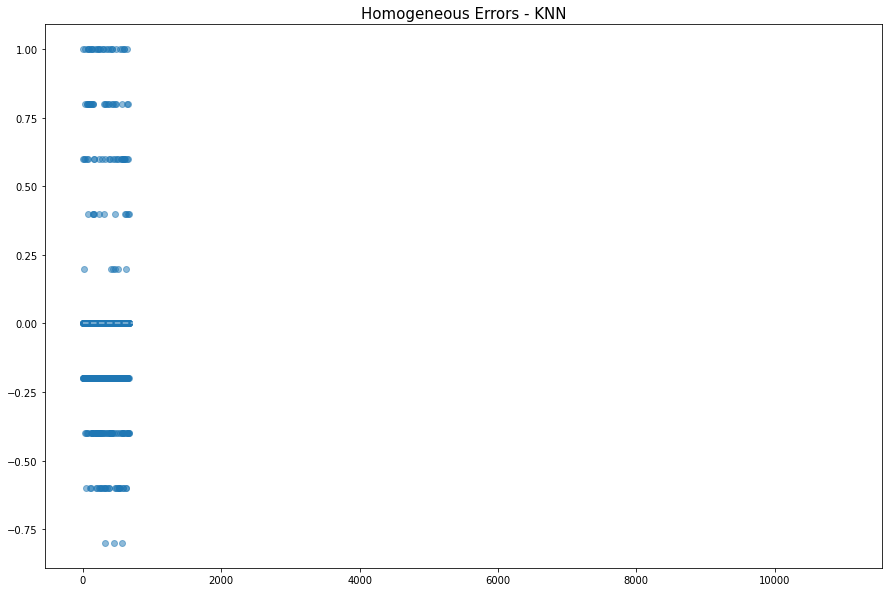

In [82]:
plt.figure(figsize=(15,10))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15)
plt.hlines(y=0, xmin=0, xmax=11000, linestyle='--', color='white', alpha=.5)


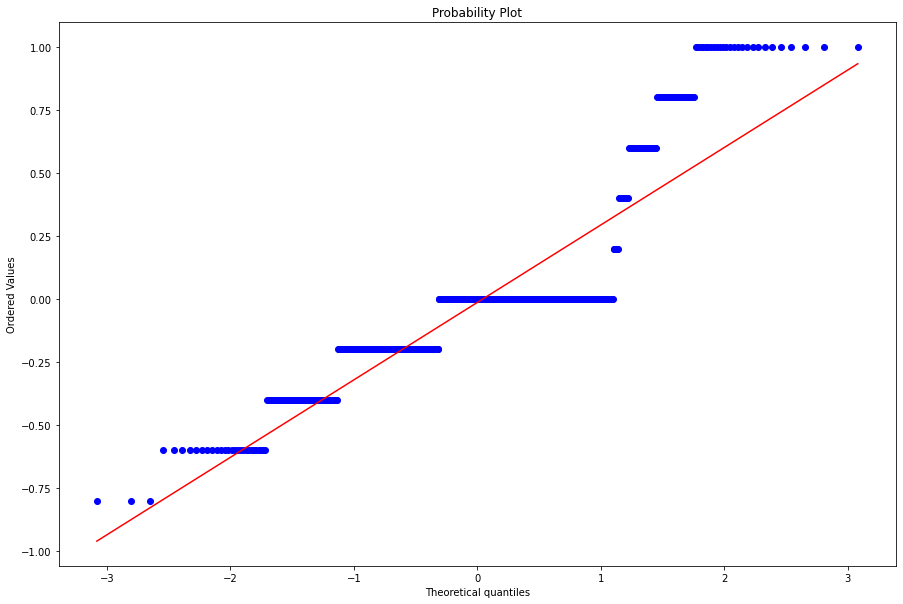

In [83]:
plt.figure(figsize=(15,10))
from scipy.stats import probplot
#QQ Plot
probplot(yerr, dist='norm', plot=plt);

# 5.Model Comparison 

In [84]:
score = [score_lr,score_log,score_dt,score_knn]
rmse = [rmse_lr, rmse_log, rmse_dt, rmse_knn]

col={'Model Score':score,'RMSE':rmse}
models=['Linear Regression','Logistic Regression','Decision Tree','KNN']
df= pd.DataFrame(data=col,index=models)
df

,Model Score,RMSE
Linear Regression,0.272953,0.291940
Logistic Regression,0.886736,0.336547
Decision Tree,0.877794,0.349579
KNN,-0.001796,0.342690


With the comparison model above, we are seeing that **Logistic Regression** and **Decision Tree** models are performing the best and generating with lowest RMSE.

Looking closer to the *Model Score* and *RMSE*, **Logistic Regression** is doing slightly better. 

Moreover, comparing the *confusion matrixes* between the two models, it is obvious that **Logistic Regression** is also better at predicting the customers responding the campaign.

In conclusion, **Logistic Regression** is a great choice for future campaign response prediction with our customer base.